## THIS PROJECT IS BASED ON A DATASET MADE AVAILABLE BY 365DATASCIENCE.COM FOR PRACTICE. THIS PROJECT WAS CARRIED OUT ON THE 17TH DECEMBER 2020.


## THE PROJECT IS ABOUT A HYPOTHETICAL COMPANY DEALING IN REAL ESTATE PROPERTIES. THE DATA SHOWS THE HOUSES SOLD BETWEEN 2004 AND 2007

In [281]:
#import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
sns.set_style('ticks')
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
pd.set_option('display.max_columns', 25)
pd.set_option('max_rows',50)

In [130]:
data=pd.read_excel('365DATASCIENCE.xlsx',sheet_name=0,parse_dates=True)

In [131]:
#Check the first few rows of the data
data.head()

,Unnamed: 0,ID,Building,Year of sale,Month of sale,Type of property,Property,Area (ft.),Price,Status,Unnamed: 10,Customer ID,...,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,NaN,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold,NaN,C0028,...,19,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,NaN,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold,NaN,C0027,...,22,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,NaN,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold,NaN,C0112,...,22,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,NaN,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold,NaN,C0160,...,22,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,NaN,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold,NaN,C0014,...,25,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [132]:
print ('The number of rows and columns in the dataset is: ',data.shape)

The number of rows and columns in the dataset is:  (267, 27)


In [133]:
#Get some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               0 non-null      float64
 1   ID                       267 non-null    int64  
 2   Building                 267 non-null    int64  
 3   Year of sale             195 non-null    float64
 4   Month of sale            195 non-null    float64
 5   Type of property         267 non-null    object 
 6   Property                 267 non-null    int64  
 7   Area (ft.)               267 non-null    float64
 8   Price                    267 non-null    float64
 9   Status                   195 non-null    object 
 10  Unnamed: 10              0 non-null      float64
 11  Customer ID              195 non-null    object 
 12  Entity                   195 non-null    object 
 13  Name                     195 non-null    object 
 14  Surname                  1

In [134]:
#changing the case of the column names to make it more workable
data.columns=data.columns.str.lower()

In [135]:
#check that the column headers are in lower case
data.columns

Index(['unnamed: 0', 'id', 'building', 'year of sale', 'month of sale',
       'type of property', 'property ', 'area (ft.)', 'price', 'status',
       'unnamed: 10', 'customer id', 'entity', 'name', 'surname',
       'age at time of purchase', 'interval', 'y', 'm', 'd', 'gender',
       'country', 'state', 'purpose', 'deal satisfaction', 'mortgage',
       'source'],
      dtype='object')

In [136]:
#Check the data types of the column names
data.dtypes

unnamed: 0                 float64
id                           int64
building                     int64
year of sale               float64
month of sale              float64
type of property            object
property                     int64
area (ft.)                 float64
price                      float64
status                      object
unnamed: 10                float64
customer id                 object
entity                      object
name                        object
surname                     object
age at time of purchase     object
interval                    object
y                          float64
m                          float64
d                          float64
gender                      object
country                     object
state                       object
purpose                     object
deal satisfaction          float64
mortgage                    object
source                      object
dtype: object

In [137]:
#Check the data after the case of the column header has been chnaged
data.head()

,unnamed: 0,id,building,year of sale,month of sale,type of property,property,area (ft.),price,status,unnamed: 10,customer id,...,age at time of purchase,interval,y,m,d,gender,country,state,purpose,deal satisfaction,mortgage,source
0,NaN,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold,NaN,C0028,...,19,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,NaN,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold,NaN,C0027,...,22,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,NaN,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold,NaN,C0112,...,22,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,NaN,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold,NaN,C0160,...,22,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,NaN,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold,NaN,C0014,...,25,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [138]:
#Getting the total price paid by each entity
data.groupby(['entity'])['price'].sum()


entity
Firm          4.307894e+06
Individual    4.823185e+07
Name: price, dtype: float64

In [139]:
#Getting the total price paid across the different gender
data.groupby(['gender'])['price'].sum()

gender
F    1.864320e+07
M    2.958864e+07
Name: price, dtype: float64

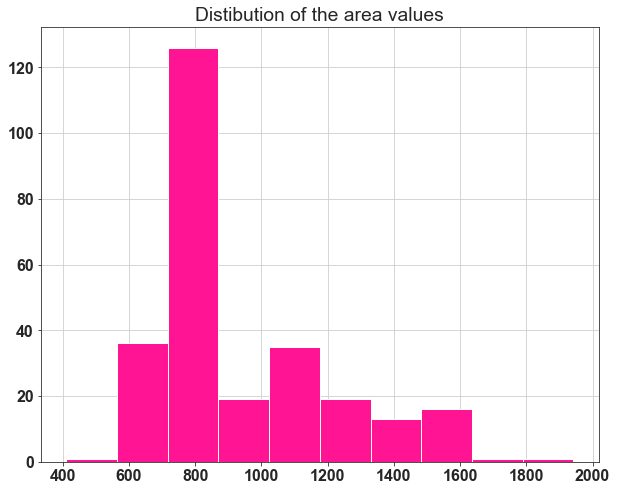

In [140]:
#Examine the distribution of the area(ft.)
data.hist(column='area (ft.)',figsize=(10,8),color='deeppink')
plt.title("Distibution of the area values");

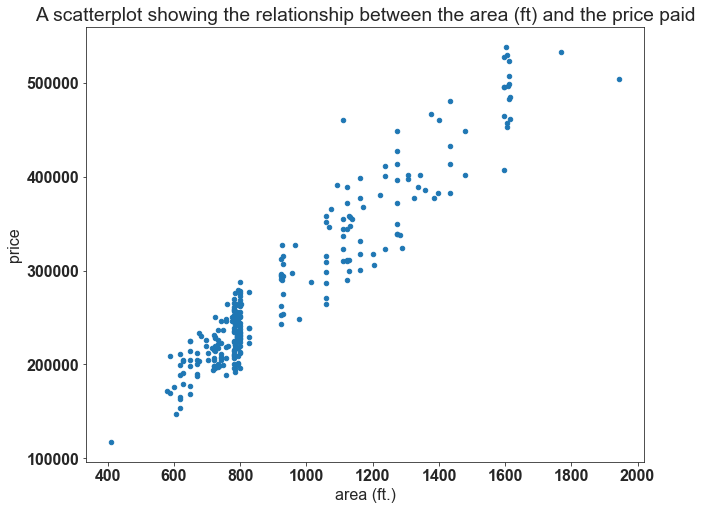

In [141]:
#Examine the relationship between the area and the price paid
data.plot(x='area (ft.)',y='price',kind='scatter',title='A scatterplot showing the relationship between the area (ft) and the price paid',figsize=(10,8));

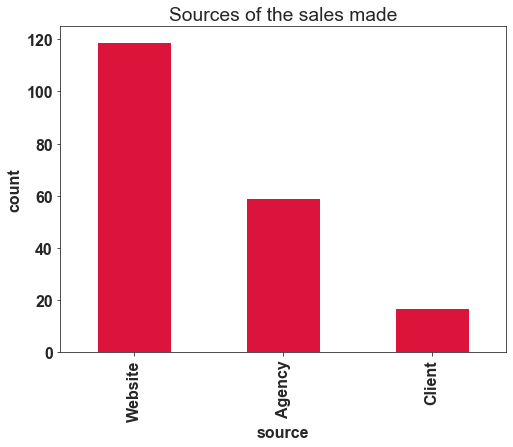

In [142]:
#Classifying the source column
data['source'].value_counts().plot(kind='bar',figsize=(8,6),title="Sources of the sales made",color='crimson')
plt.xlabel("source",fontweight='bold')
plt.ylabel("count",fontweight='bold');

## AS AN ALTERNATIVE TO THE ABOVE METHOD, WE CAN PLACE THE VALUE COUNT INSIDE A DATAFRAME AND THEN CREATE A PLOT ACCORDINGLY USING THE SEABORN LIBRARY.

In [143]:
x=data['source'].value_counts().reset_index()

In [144]:
source_counts=pd.DataFrame(x)

In [145]:
source_counts

,index,source
0,Website,119
1,Agency,59
2,Client,17


In [146]:
source_counts.columns=['source','count']

In [147]:
source_counts

,source,count
0,Website,119
1,Agency,59
2,Client,17


In [148]:
# We calculate the percentage of each source to the total sources.
source_counts['percent']=source_counts['count'].apply(lambda x: 100*x/sum(source_counts['count']))
source_counts=source_counts.sort_values('source')

In [149]:
source_counts

,source,count,percent
1,Agency,59,30.256410
2,Client,17,8.717949
0,Website,119,61.025641


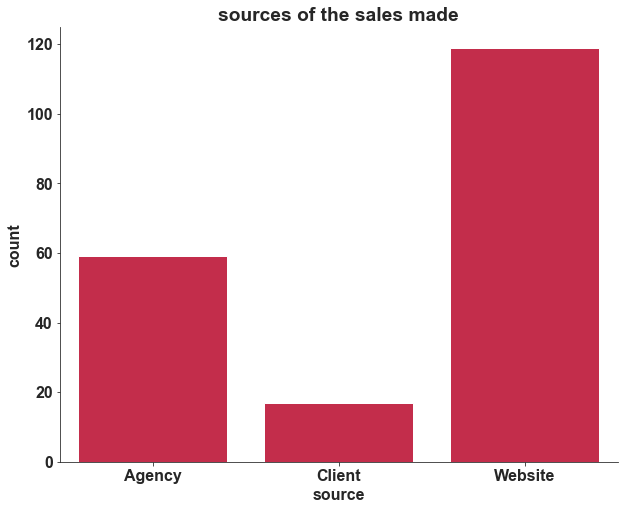

In [150]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x='source',y='count',data=source_counts,color='crimson',ax=ax,ci=95)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("source",fontweight='bold')
plt.ylabel("count",fontweight='bold')
ax.set_title("sources of the sales made",fontweight='bold');


In [151]:
data['age at time of purchase'].dropna(how=' any')

0      19
1      22
2      22
3      22
4      25
       ..
174    73
175    73
176    73
177    76
178      
Name: age at time of purchase, Length: 179, dtype: object

In [152]:
data['year of sale']=pd.to_datetime(data['year of sale'])

In [153]:
#Drop any row in which the year of sales is not available
data['year of sale'].dropna(how=' any')

0     1970-01-01 00:00:00.000002005
1     1970-01-01 00:00:00.000002005
2     1970-01-01 00:00:00.000002007
3     1970-01-01 00:00:00.000002007
4     1970-01-01 00:00:00.000002004
                   ...             
191   1970-01-01 00:00:00.000002005
192   1970-01-01 00:00:00.000002005
193   1970-01-01 00:00:00.000002005
194   1970-01-01 00:00:00.000002005
195   1970-01-01 00:00:00.000002005
Name: year of sale, Length: 195, dtype: datetime64[ns]

In [154]:
data.head()

,unnamed: 0,id,building,year of sale,month of sale,type of property,property,area (ft.),price,status,unnamed: 10,customer id,...,age at time of purchase,interval,y,m,d,gender,country,state,purpose,deal satisfaction,mortgage,source
0,NaN,1030,1,1970-01-01 00:00:00.000002005,11.0,Apartment,30,743.0856,246172.6760,Sold,NaN,C0028,...,19,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,NaN,1029,1,1970-01-01 00:00:00.000002005,10.0,Apartment,29,756.2128,246331.9040,Sold,NaN,C0027,...,22,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,NaN,2002,2,1970-01-01 00:00:00.000002007,7.0,Apartment,2,587.2808,209280.9104,Sold,NaN,C0112,...,22,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,NaN,2031,2,1970-01-01 00:00:00.000002007,12.0,Apartment,31,1604.7464,452667.0064,Sold,NaN,C0160,...,22,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,NaN,1049,1,1970-01-01 00:00:00.000002004,11.0,Apartment,49,1375.4508,467083.3132,Sold,NaN,C0014,...,25,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


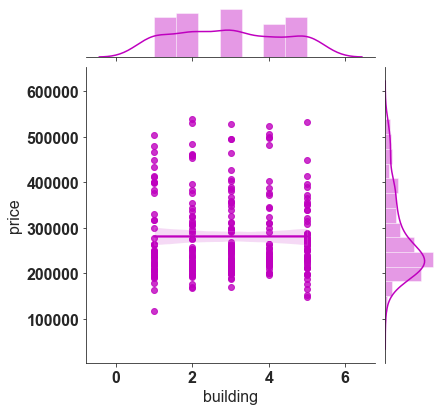

In [155]:
#Jointplot of price against building
sns.jointplot(x='building',y='price',data=data,kind='reg',color='m')
plt.show()

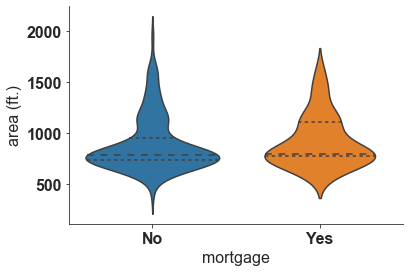

In [156]:
# Violin Plot
ax = sns.violinplot(y=data['area (ft.)'], x=data['mortgage'], inner="quartile")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

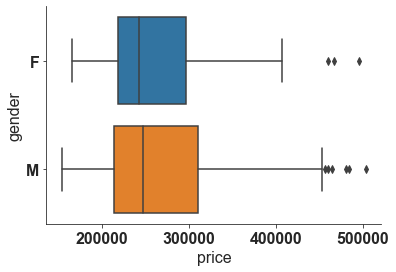

In [157]:
#horizontal boxplot 
#To do this, we just switch between x and y
ax=sns.boxplot(y=data['gender'],x=data['price'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);


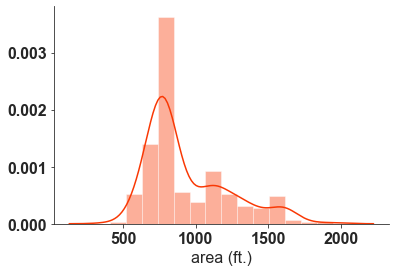

In [158]:
#Histogram with several variables
ax=sns.distplot(data['area (ft.)'],kde= True,color="#f93804",label='Area in feet of the houses')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

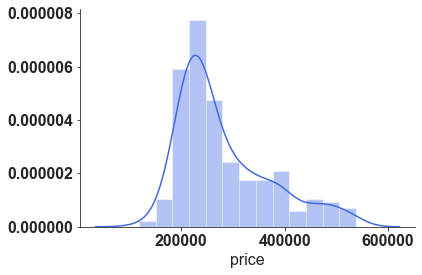

In [159]:
#Histogram with several variables
ax=sns.distplot(data['price'],kde= True,color='#4169e1',label='Area in feet of the houses')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

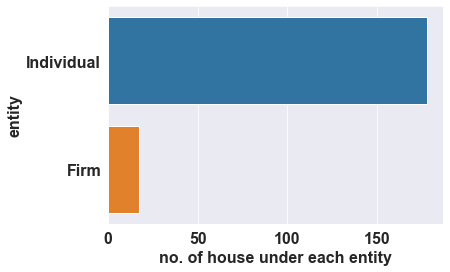

In [171]:
with sns.axes_style('darkgrid'):
    sns.countplot(y=data['entity'])
    plt.xlabel('no. of house under each entity',fontweight='bold')
    plt.ylabel('entity',fontweight='bold')
    
                    

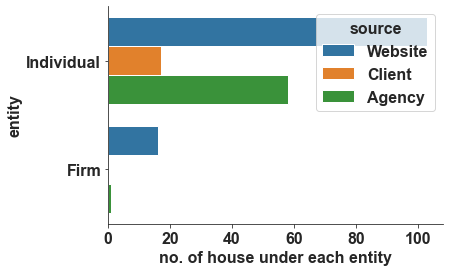

In [177]:
with sns.axes_style('ticks'):
    ax=sns.countplot(y='entity', hue='source', data=data)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('no. of house under each entity', fontweight='bold')
    plt.ylabel('entity', fontweight='bold')

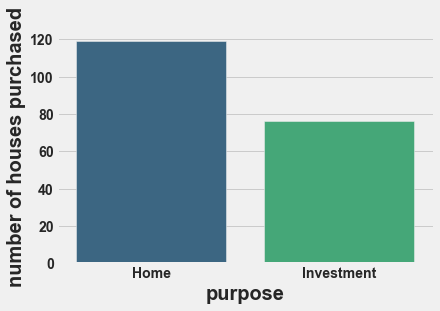

In [184]:
with plt.style.context('fivethirtyeight'):
    ax=sns.countplot(x='purpose', data=data,palette='viridis')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('purpose',fontsize=20, fontweight='bold')
    plt.ylabel('number of houses purchased', fontsize=20,fontweight='bold')

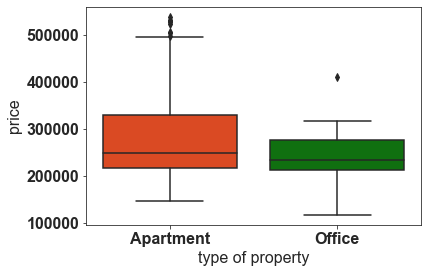

In [202]:
#boxplot with specific color for each group
my_pal={"Apartment":"#f93804","Office":"green" }
sns.boxplot(x=data['type of property'],y=data['price'],palette=my_pal);

In [203]:
data['state']=data['state'].dropna(how='any')

In [212]:
x=data.groupby(['state'])['price'].sum().sort_values(ascending=False)

In [213]:
x

state
California    3.330352e+07
Nevada        4.660128e+06
Arizona       2.854796e+06
Oregon        2.602527e+06
Colorado      2.570287e+06
Utah          1.386852e+06
Virginia      8.605767e+05
Kansas        2.521860e+05
Wyoming       2.042867e+05
Name: price, dtype: float64

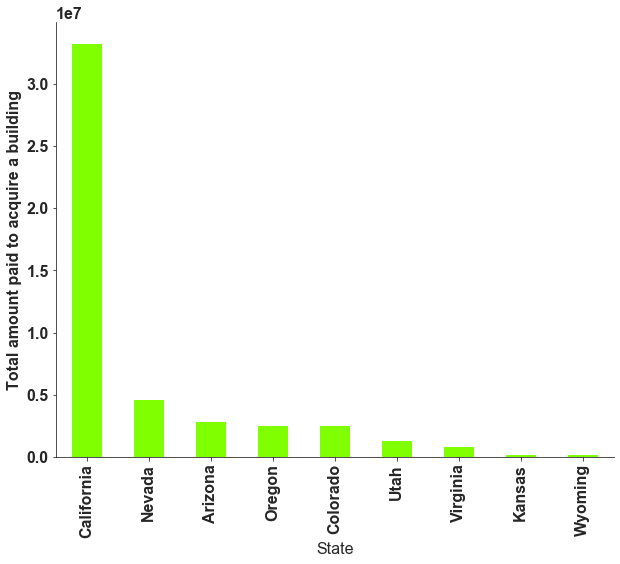

In [226]:
figsizeg,ax=plt.subplots()
x.plot(color='chartreuse',kind='bar',figsize=(10,8),ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Total amount paid to acquire a building',fontweight='bold')
plt.xlabel('State');

In [227]:
data['price'].max()

538271.7356

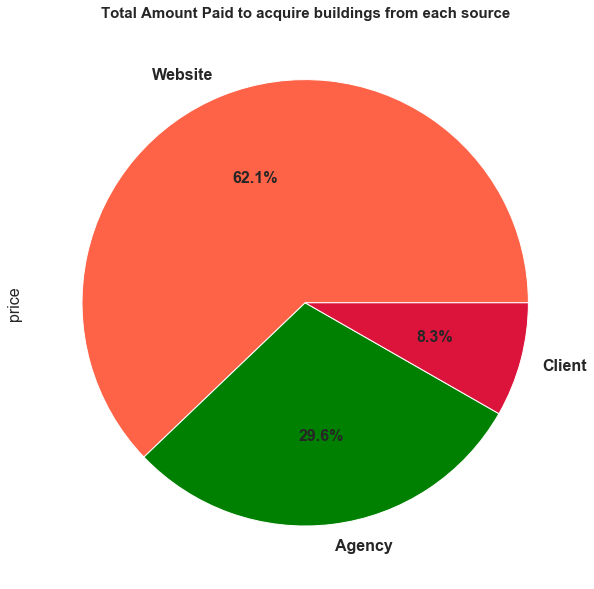

In [238]:
Z=data.groupby('source')['price'].sum().sort_values(ascending=False)
Z.plot.pie(figsize=(10,12),colors=['tomato','green','crimson','#452276','magenta','lime'],autopct='%1.1f%%')
plt.title('Total Amount Paid to acquire buildings from each source',fontdict={'fontsize':15,'fontweight':'bold'});

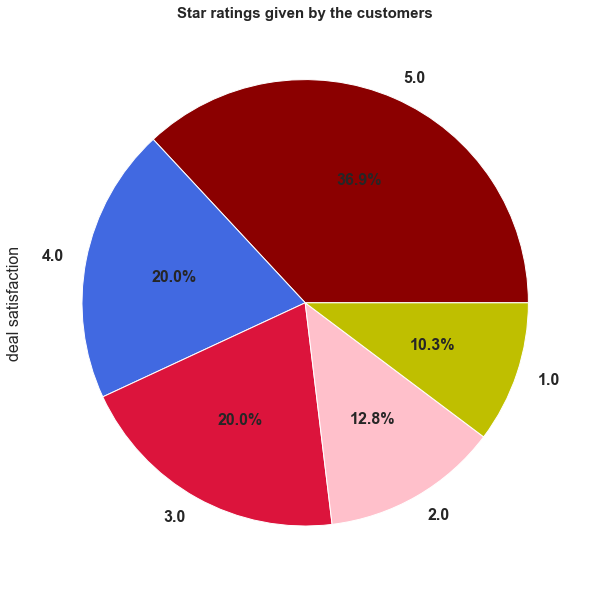

In [243]:
sat=data['deal satisfaction'].value_counts(sort= True)
sat.plot.pie(figsize=(10,12),colors=['darkred','royalblue','crimson','pink','y'],autopct='%1.1f%%')
plt.title('Star ratings given by the buyers',fontdict={'fontsize':15,'fontweight':'bold'});

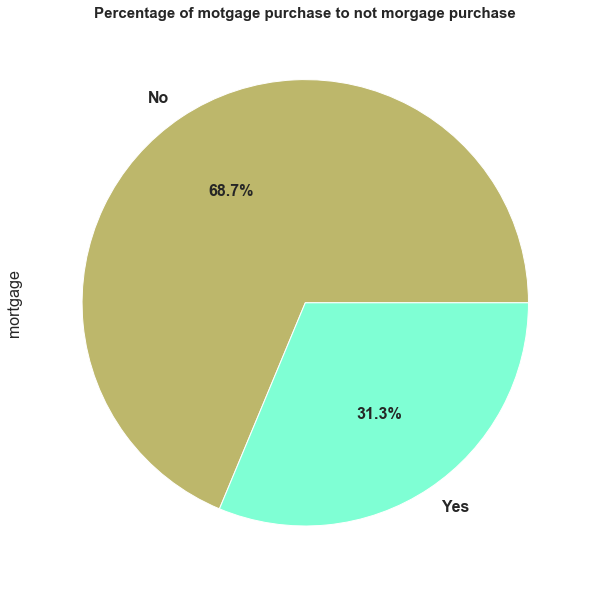

In [245]:
morg_or_not=data['mortgage'].value_counts(sort= True)
morg_or_not.plot.pie(figsize=(10,12),colors=['#bdb76b','#7fffd4'],autopct='%1.1f%%')
plt.title("Percentage of motgage purchase to not morgage purchase",fontdict={'fontsize':15,'fontweight':'bold'});

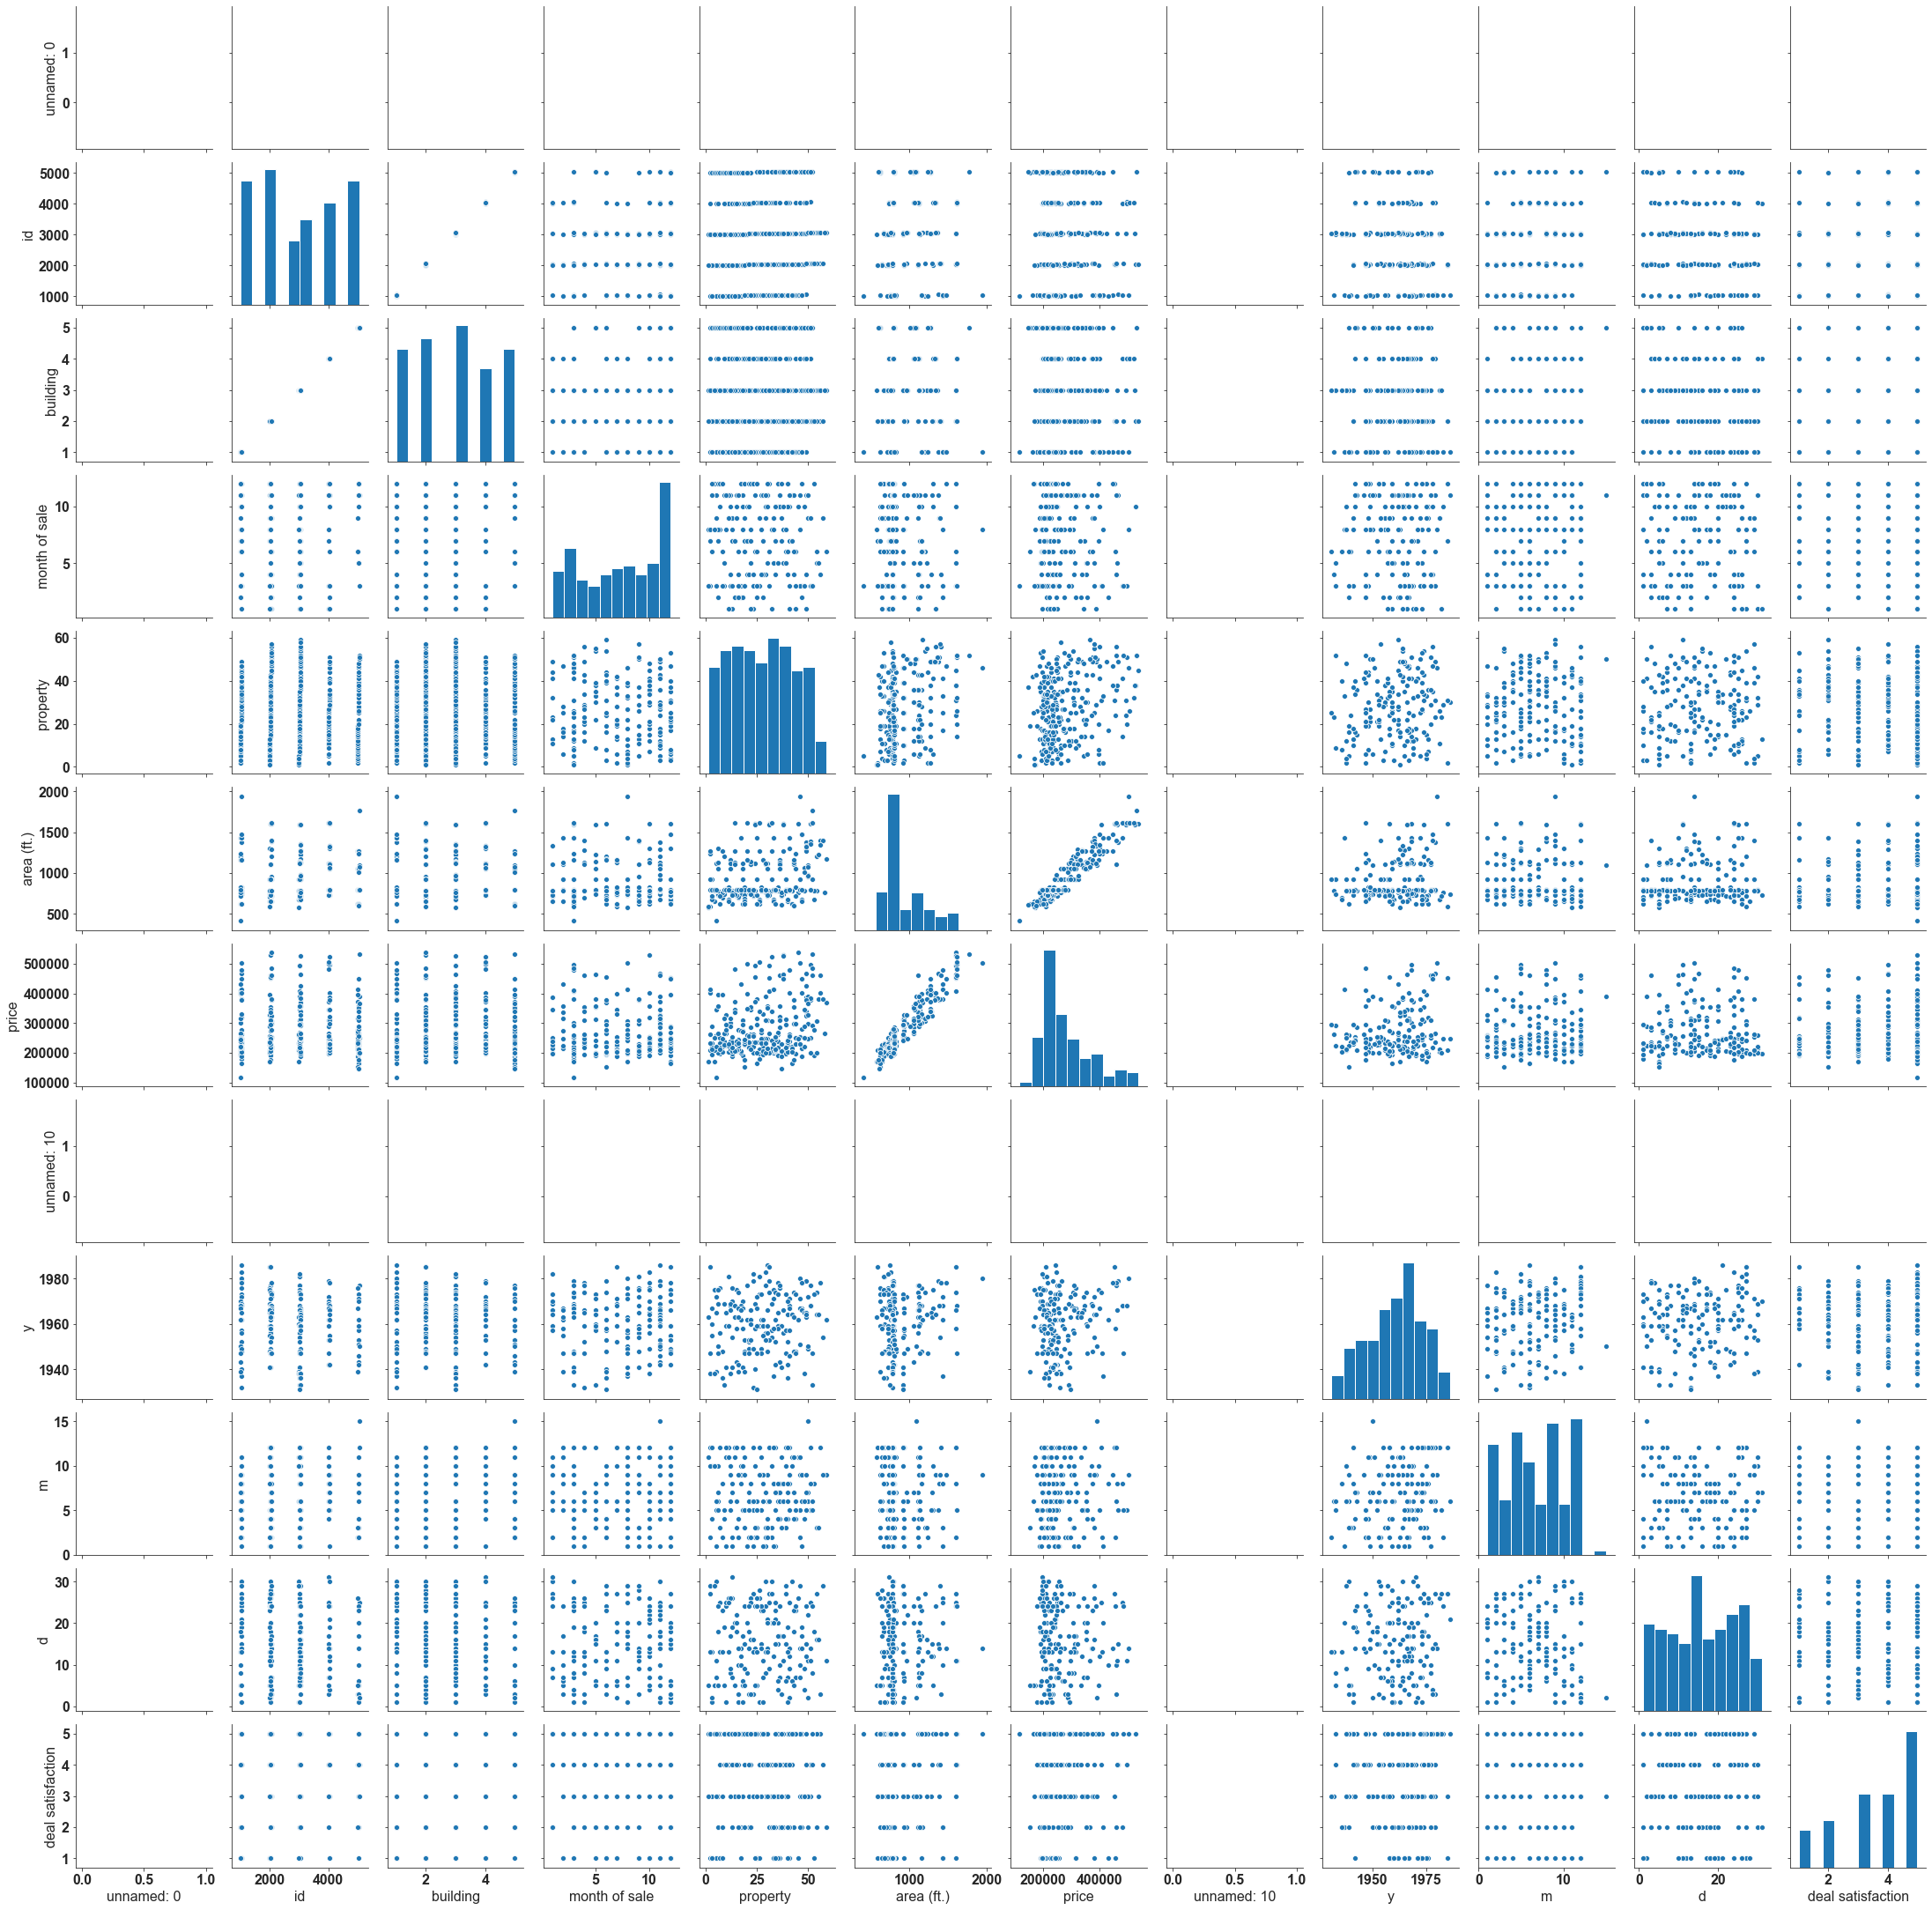

In [247]:
#correlogram
sns.pairplot(data)

In [275]:
#The area (ft.) was renamed in order to make the data easier to work with
data=data.rename(columns={'area (ft.)':'area'})

In [277]:
#Initialise and fit linear regression model
model=smf.ols("price~ area",data=data)
model=model.fit()

In [278]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2512.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):          3.32e-137
Time:                        10:59:46   Log-Likelihood:                -3107.9
No. Observations:                 267   AIC:                             6220.
Df Residuals:                     265   BIC:                             6227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2633.6203   5808.341      0.453      0.651   -8802.749    1.41e+04
area         297.5134      5.936     50.118      0.000     285.825     309.202
==============================================================================
Omnibus:                       10.882   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.037
Skew:                           0.300   Prob(JB):                     0.000543
Kurtosis:                       3.996   Cond. No.                     3.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""